### Step 1 and 2 - Install pyodbc and python-dotenv

In [93]:
# %pip install pyodbc  
# %pip install python-dotenv 


SERVER='dap-projects-database.database.windows.net'
DATABASE='dapDB'
USERNAME='LP2_project'
PASSWORD='Stat$AndD@t@Rul3'

In [94]:
import warnings

warnings.filterwarnings('ignore')

### Step 3 - Import all the necessary packages

In [95]:
import pandas as pd
from  dotenv import dotenv_values
import pyodbc
import sqlalchemy
import numpy as np

### Create a connection by accessing your connection string with your defined environment variables

Step 4 - Create your .env file in the root of your project

Step 5 - In the .env file, put all your sensitive information like server name, password etc

Step 6 & 7 - Next create a .gitignore file and type '/.env' file we just created. This will prevent git from tracking that file.

Step 8 - Create a connection by accessing your connection string with your defined environment variables

In [96]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('/.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [97]:
# # Create a connection string
# connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

connection_string = "Driver={SQL Server};Server=dap-projects-database.database.windows.net;Database=dapDB;UID=LP2_project;PWD=Stat$AndD@t@Rul3;"


In [98]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [99]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

# query = "SELECT * FROM LP2_Telco_churn_first_3000"

# data = pd.read_sql(query, connection)

query = "SELECT * FROM [LP2_Telco_churn_first_3000]"
try:
    data = pd.read_sql(query, connection)
except Exception as e:
    print("Error reading data:", e)


In [100]:
data.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female          False     True       False       1   
1  5575-GNVDE    Male          False    False       False      34   
2  3668-QPYBK    Male          False    False       False       2   
3  7795-CFOCW    Male          False    False       False      45   
4  9237-HQITU  Female          False    False       False       2   

   PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0         False          None             DSL          False  ...   
1          True         False             DSL           True  ...   
2          True         False             DSL           True  ...   
3         False          None             DSL           True  ...   
4          True         False     Fiber optic          False  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0            False       False       False           False  Month-to-month   
1             True       False       False           False        One year   
2            False       False       False           False  Month-to-month   
3             True        True       False           False        One year   
4            False       False       False           False  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0             True           Electronic check      29.850000     29.850000   
1            False               Mailed check      56.950001   1889.500000   
2             True               Mailed check      53.849998    108.150002   
3            False  Bank transfer (automatic)      42.299999   1840.750000   
4             True           Electronic check      70.699997    151.649994   

   Churn  
0  False  
1  False  
2   True  
3  False  
4   True  

[5 rows x 21 columns]

In [101]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [102]:
data.describe(include='object').columns

Index(['customerID', 'gender', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Churn'],
      dtype='object')

In [103]:
data.describe(include='number').columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [105]:
data.shape

(3000, 21)

### Concatenating with other data from other sources

In [106]:
# Load the second dataset from GitHub
url_github = "LP2_Telco-churn-second-2000.csv"
data_second = pd.read_csv(url_github)

In [107]:
# Load the testing dataset from OneDrive
url_onedrive = "LP2_Telco-churn-second-2000_1.csv"  # Replace with your link
data_testing = pd.read_csv(url_onedrive)

In [108]:

# Concatenate the datasets
combined_data = pd.concat([data, data_second], ignore_index=True)

# If you want to include the testing dataset as well, you can concatenate it
# combined_data = pd.concat([data, data_second, data_testing], ignore_index=True)

# Display the combined dataset
print(combined_data.head())
print(combined_data.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0    True      False       1        False   
1  5575-GNVDE    Male              0   False      False      34         True   
2  3668-QPYBK    Male              0   False      False       2         True   
3  7795-CFOCW    Male              0   False      False      45        False   
4  9237-HQITU  Female              0   False      False       2         True   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0          None             DSL          False  ...            False   
1         False             DSL           True  ...             True   
2         False             DSL           True  ...            False   
3          None             DSL           True  ...             True   
4         False     Fiber optic          False  ...            False   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       

### Data Exploration and Preprocessing

Now that we have concatenated the datasets, we can proceed with data exploration and preprocessing as previously mentioned:

1. Check for Missing Values:

In [109]:
combined_data.fillna(method='ffill', inplace=True)  # Example forward fill


2. Handle Missing Values:

In [110]:
combined_data.fillna(method='ffill', inplace=True)  # Example forward fill


In [111]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5042 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [112]:
#converting the datatypes for total charges

combined_data['TotalCharges'] = pd.to_numeric(combined_data['TotalCharges'], errors = 'coerce')

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [113]:
print(combined_data['TotalCharges'].dtype)
print(data['TotalCharges'].dtype)

float64
float64


In [114]:
combined_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       1
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64

### <b>Observation</b><br>
Inpute the missing values<br>
Drop the ones with the fewer missing values<br>
Check for outliers & make sure to standardize if necessary<br>

In [115]:
def unique_values(dataframe):
    unique_summary = []
    for column in dataframe.columns:
        values = dataframe[column].unique()
        counts_values = len(values)
        
        unique_summary.append({
            'Column':column,
            'Unique_values':values,
            'Count_of_Unique_values': counts_values})
    usummary = pd.DataFrame(unique_summary)
    
    return usummary

In [116]:
unique_values(combined_data)

Column                                      Unique_values  \
0         customerID  [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...   
1             gender                                     [Female, Male]   
2      SeniorCitizen                                             [0, 1]   
3            Partner                             [True, False, No, Yes]   
4         Dependents                             [False, True, No, Yes]   
5             tenure  [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...   
6       PhoneService                             [False, True, Yes, No]   
7      MultipleLines     [None, False, True, No, No phone service, Yes]   
8    InternetService                             [DSL, Fiber optic, No]   
9     OnlineSecurity        [False, True, No, Yes, No internet service]   
10      OnlineBackup        [True, False, No, Yes, No internet service]   
11  DeviceProtection        [False, True, No, Yes, No internet service]   
12       TechSupport        [False, True, Yes, No, No internet service]   
13       StreamingTV        [False, True, No, Yes, No internet service]   
14   StreamingMovies        [False, True, No, Yes, No internet service]   
15          Contract               [Month-to-month, One year, Two year]   
16  PaperlessBilling                             [True, False, Yes, No]   
17     PaymentMethod  [Electronic check, Mailed check, Bank transfer...   
18    MonthlyCharges  [29.850000381469727, 56.95000076293945, 53.849...   
19      TotalCharges  [29.850000381469727, 1889.5, 108.1500015258789...   
20             Churn                             [False, True, No, Yes]   

    Count_of_Unique_values  
0                     5043  
1                        2  
2                        2  
3                        4  
4                        4  
5                       73  
6                        4  
7                        6  
8                        3  
9                        5  
10                       5  
11                       5  
12                       5  
13                       5  
14                       5  
15                       3  
16                       4  
17                       4  
18                    2069  
19                    4864  
20                       4

In [117]:
# #droping customer ID column
# combined_data.drop(columns = 'customerID', inplace = True)
# data .drop(columns = 'customerID', inplace = True)

In [118]:
combined_data.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0    True      False       1        False   
1  5575-GNVDE    Male              0   False      False      34         True   
2  3668-QPYBK    Male              0   False      False       2         True   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0          None             DSL          False  ...            False   
1         False             DSL           True  ...             True   
2         False             DSL           True  ...            False   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       False       False           False  Month-to-month             True   
1       False       False           False        One year            False   
2       False       False           False  Month-to-month             True   

      PaymentMethod MonthlyCharges  TotalCharges  Churn  
0  Electronic check      29.850000     29.850000  False  
1      Mailed check      56.950001   1889.500000  False  
2      Mailed check      53.849998    108.150002   True  

[3 rows x 21 columns]

In [119]:
#converting to Yes and No
labels = combined_data.select_dtypes(include = 'object').columns.tolist()
labels

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [120]:
#Convert to strings
combined_data[labels] = combined_data[labels].astype(str)

In [121]:
unique_values(combined_data)

Column                                      Unique_values  \
0         customerID  [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...   
1             gender                                     [Female, Male]   
2      SeniorCitizen                                             [0, 1]   
3            Partner                             [True, False, No, Yes]   
4         Dependents                             [False, True, No, Yes]   
5             tenure  [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...   
6       PhoneService                             [False, True, Yes, No]   
7      MultipleLines     [None, False, True, No, No phone service, Yes]   
8    InternetService                             [DSL, Fiber optic, No]   
9     OnlineSecurity        [False, True, No, Yes, No internet service]   
10      OnlineBackup        [True, False, No, Yes, No internet service]   
11  DeviceProtection        [False, True, No, Yes, No internet service]   
12       TechSupport        [False, True, Yes, No, No internet service]   
13       StreamingTV        [False, True, No, Yes, No internet service]   
14   StreamingMovies        [False, True, No, Yes, No internet service]   
15          Contract               [Month-to-month, One year, Two year]   
16  PaperlessBilling                             [True, False, Yes, No]   
17     PaymentMethod  [Electronic check, Mailed check, Bank transfer...   
18    MonthlyCharges  [29.850000381469727, 56.95000076293945, 53.849...   
19      TotalCharges  [29.850000381469727, 1889.5, 108.1500015258789...   
20             Churn                             [False, True, No, Yes]   

    Count_of_Unique_values  
0                     5043  
1                        2  
2                        2  
3                        4  
4                        4  
5                       73  
6                        4  
7                        6  
8                        3  
9                        5  
10                       5  
11                       5  
12                       5  
13                       5  
14                       5  
15                       3  
16                       4  
17                       4  
18                    2069  
19                    4864  
20                       4

In [122]:
#add a function to make necessary changes
binary = {
    "No":["False","0","No phone service", "No internet service"],
    "Yes":["True", "1"]
}

def correct_column(combined_data, labels, binary):
    for column_name in labels:
        for key, values in binary.items():
            combined_data[column_name]= combined_data[column_name].replace(values,key)
    return combined_data

combined_data = correct_column(combined_data, labels, binary)

In [123]:
#verifying
unique_values(combined_data)

Column                                      Unique_values  \
0         customerID  [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...   
1             gender                                     [Female, Male]   
2      SeniorCitizen                                             [0, 1]   
3            Partner                                          [Yes, No]   
4         Dependents                                          [No, Yes]   
5             tenure  [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...   
6       PhoneService                                          [No, Yes]   
7      MultipleLines                                    [None, No, Yes]   
8    InternetService                             [DSL, Fiber optic, No]   
9     OnlineSecurity                                          [No, Yes]   
10      OnlineBackup                                          [Yes, No]   
11  DeviceProtection                                          [No, Yes]   
12       TechSupport                                          [No, Yes]   
13       StreamingTV                                          [No, Yes]   
14   StreamingMovies                                          [No, Yes]   
15          Contract               [Month-to-month, One year, Two year]   
16  PaperlessBilling                                          [Yes, No]   
17     PaymentMethod  [Electronic check, Mailed check, Bank transfer...   
18    MonthlyCharges  [29.850000381469727, 56.95000076293945, 53.849...   
19      TotalCharges  [29.850000381469727, 1889.5, 108.1500015258789...   
20             Churn                                          [No, Yes]   

    Count_of_Unique_values  
0                     5043  
1                        2  
2                        2  
3                        2  
4                        2  
5                       73  
6                        2  
7                        3  
8                        3  
9                        2  
10                       2  
11                       2  
12                       2  
13                       2  
14                       2  
15                       3  
16                       2  
17                       4  
18                    2069  
19                    4864  
20                       2

In [124]:
#create a list for the numerical
numbers = combined_data [["tenure", "TotalCharges", "MonthlyCharges"]]
numbers

tenure  TotalCharges  MonthlyCharges
0          1     29.850000       29.850000
1         34   1889.500000       56.950001
2          2    108.150002       53.849998
3         45   1840.750000       42.299999
4          2    151.649994       70.699997
...      ...           ...             ...
5038      24   1990.500000       84.800000
5039      72   7362.900000      103.200000
5040      11    346.450000       29.600000
5041       4    306.600000       74.400000
5042      66   6844.500000      105.650000

[5043 rows x 3 columns]

### Inputing missing values

In [125]:
#filling for numerical - Total charges
combined_data ['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

In [126]:
#Select the categorical columns with missing values
cat_cols = combined_data[['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                          'DeviceProtection', 'TechSupport', 'StreamingTV',
                          'StreamingMovies','Churn']]

for col in cat_cols:
    combined_data[col].replace("",np.nan, inplace = True) #Replace empty strings with NaN
    combined_data[col].replace("NaN",np.nan, inplace = True) #Replace strings 'NaN' with NaN
    combined_data[col].replace("nan",np.nan, inplace=True)
    combined_data[col].fillna(combined_data[col].mode()[0],inplace = True)#Fill all nan with mode
    

In [127]:
#Verfying
for col in cat_cols:
    print(f"Unique Values in {col}: {combined_data[col].unique()}")

Unique Values in MultipleLines: ['None' 'No' 'Yes']
Unique Values in OnlineSecurity: ['No' 'Yes']
Unique Values in OnlineBackup: ['Yes' 'No']
Unique Values in DeviceProtection: ['No' 'Yes']
Unique Values in TechSupport: ['No' 'Yes']
Unique Values in StreamingTV: ['No' 'Yes']
Unique Values in StreamingMovies: ['No' 'Yes']
Unique Values in Churn: ['No' 'Yes']


In [128]:
unique_values(combined_data)

Column                                      Unique_values  \
0         customerID  [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...   
1             gender                                     [Female, Male]   
2      SeniorCitizen                                             [0, 1]   
3            Partner                                          [Yes, No]   
4         Dependents                                          [No, Yes]   
5             tenure  [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...   
6       PhoneService                                          [No, Yes]   
7      MultipleLines                                    [None, No, Yes]   
8    InternetService                             [DSL, Fiber optic, No]   
9     OnlineSecurity                                          [No, Yes]   
10      OnlineBackup                                          [Yes, No]   
11  DeviceProtection                                          [No, Yes]   
12       TechSupport                                          [No, Yes]   
13       StreamingTV                                          [No, Yes]   
14   StreamingMovies                                          [No, Yes]   
15          Contract               [Month-to-month, One year, Two year]   
16  PaperlessBilling                                          [Yes, No]   
17     PaymentMethod  [Electronic check, Mailed check, Bank transfer...   
18    MonthlyCharges  [29.850000381469727, 56.95000076293945, 53.849...   
19      TotalCharges  [29.850000381469727, 1889.5, 108.1500015258789...   
20             Churn                                          [No, Yes]   

    Count_of_Unique_values  
0                     5043  
1                        2  
2                        2  
3                        2  
4                        2  
5                       73  
6                        2  
7                        3  
8                        3  
9                        2  
10                       2  
11                       2  
12                       2  
13                       2  
14                       2  
15                       3  
16                       2  
17                       4  
18                    2069  
19                    4863  
20                       2

### Univariate Analysis

In [129]:
combined_data.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    5043.000000  5043.000000     5043.000000   5043.000000
mean        0.162403    32.576641       65.090214   2302.959420
std         0.368857    24.529807       30.068133   2270.009809
min         0.000000     0.000000       18.400000     18.799999
25%         0.000000     9.000000       35.775000    417.725006
50%         0.000000    29.000000       70.550003   1404.650024
75%         0.000000    56.000000       90.050003   3864.000000
max         1.000000    72.000000      118.650002   8670.100000

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

Column :tenure
Skewness :0.23
Kurtosis :-1.39
Mean :32.58
Median :29.0
------------------------------
Column :TotalCharges
Skewness :0.94
Kurtosis :-0.28
Mean :2303.49
Median :1401.28
------------------------------
Column :MonthlyCharges
Skewness :-0.24
Kurtosis :-1.25
Mean :65.09
Median :70.55
------------------------------


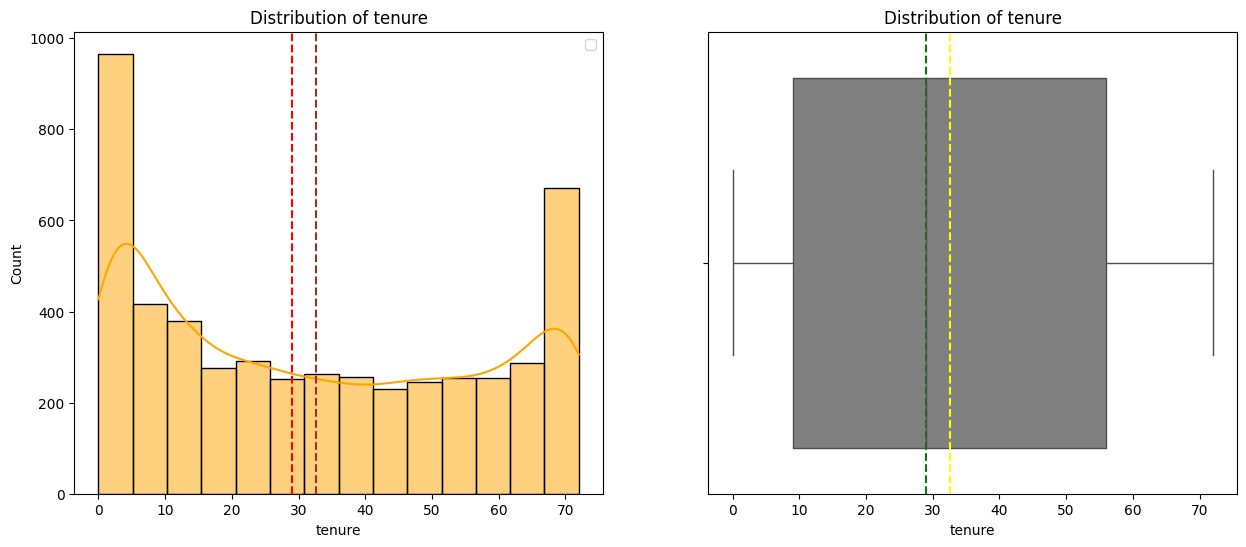

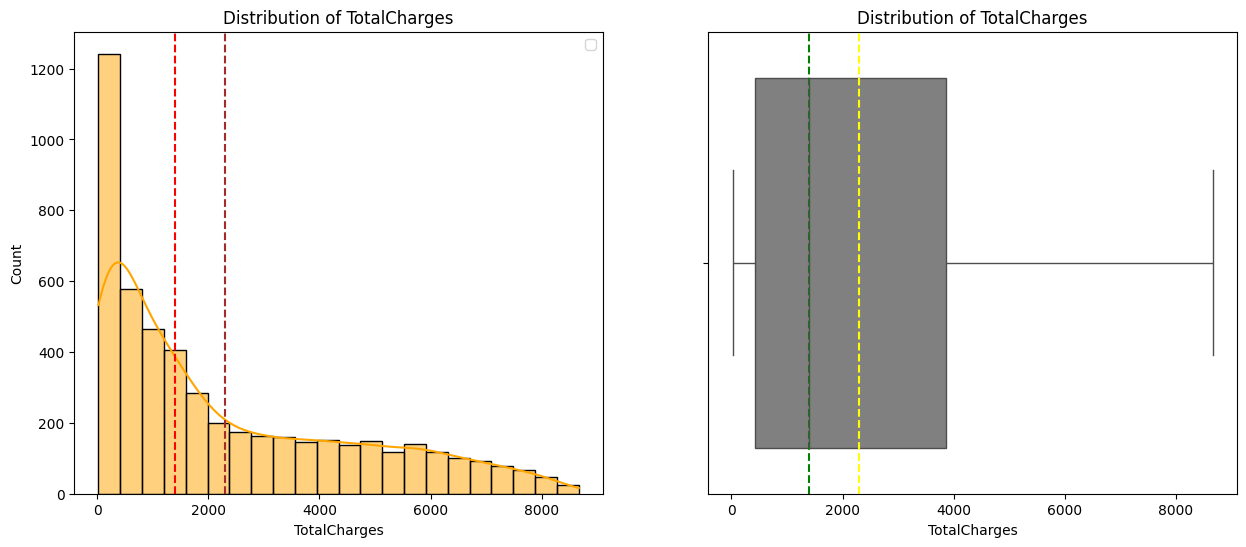

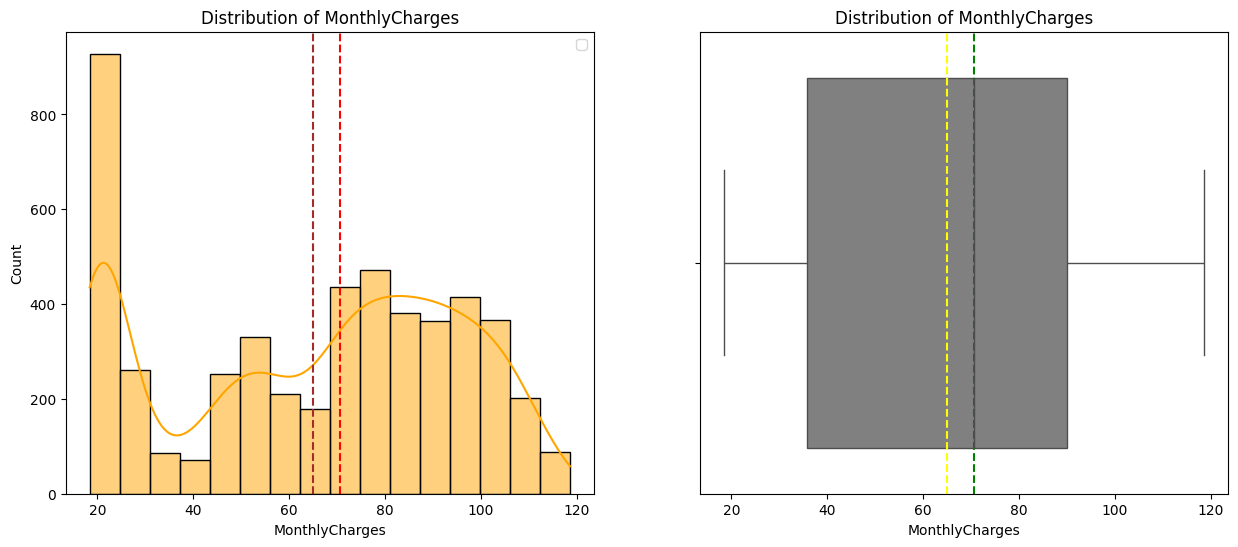

In [131]:
for col in numbers:
    #calculate some statistical measures
    skewness = round(numbers[col].skew(),2)
    kurtosis = round(numbers[col].kurtosis(),2)
    mean = round(numbers[col].mean(),2)
    median = round(numbers[col].median(), 2)
    
#print the columns and their values
    print(f"Column :{col}")
    print(f"Skewness :{skewness}")
    print(f"Kurtosis :{kurtosis}")
    print(f"Mean :{mean}")
    print(f"Median :{median}")
    print("-" * 30)
    #Set plot size
    plt.figure(figsize=(15,6))


    #adding the hisplot
    plt.subplot(1,2,1)
    sns.histplot(numbers[col], kde = True, color='Orange', edgecolor = 'black', fill= True)
    plt.axvline(mean , color = 'brown', linestyle = 'dashed')
    plt.axvline(median, color = 'red', linestyle = 'dashed')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()

    #adding the boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x = numbers[col], color='gray')
    plt.axvline(mean , color = 'yellow', linestyle = 'dashed')
    plt.axvline(median, color = 'green', linestyle = 'dashed')
    plt.title(f"Distribution of {col}")
    # plt.xlabel(col)
    # plt.ylabel('Count')
    # plt.legend()


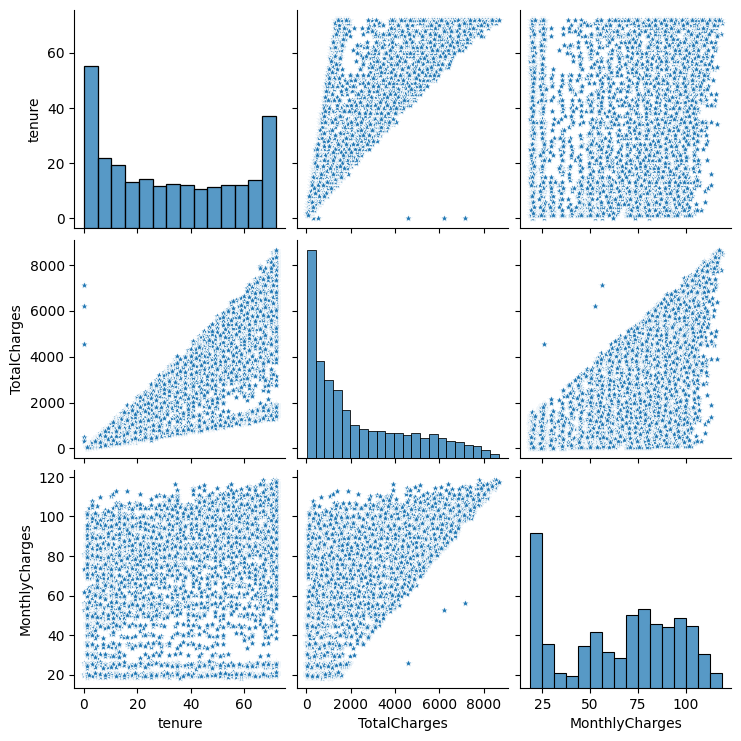

In [132]:
sns.pairplot(numbers, markers = '*', palette= 'viridis')

In [133]:
#for categorical feature
def visual_cat(combined_data, column):
    fig, axes = plt.subplots(3, len(column), figsize=(15,20))
    
    for i, column in enumerate(column):
        
        count_ax = sns.countplot(x=combined_data[column], ax=axes[0,i], color = 'blue')
        axes[0,1].set_title(f"Countplot of {column}")
        
        #add labels
        total = len(combined_data)
        for container in count_ax.containers:
            label = [f"{h.get_height()} ({h.get_height() / total*100:.2f}%" if h.get_height() > 0 else '' for h in container ]
            count_ax.bar_label(container, label)
        
        #boxplot
        sns.boxplot(combined_data[column], ax = axes[1,i], color = 'green')
        axes[1,i].set_title(f"Boxplot of {column}")
        
        #add labels
        freq = combined_data[column].mode()
        axes[1,i].text(0.05,freq,f"Mode:{freq}", color='black', va='center')
        
        
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

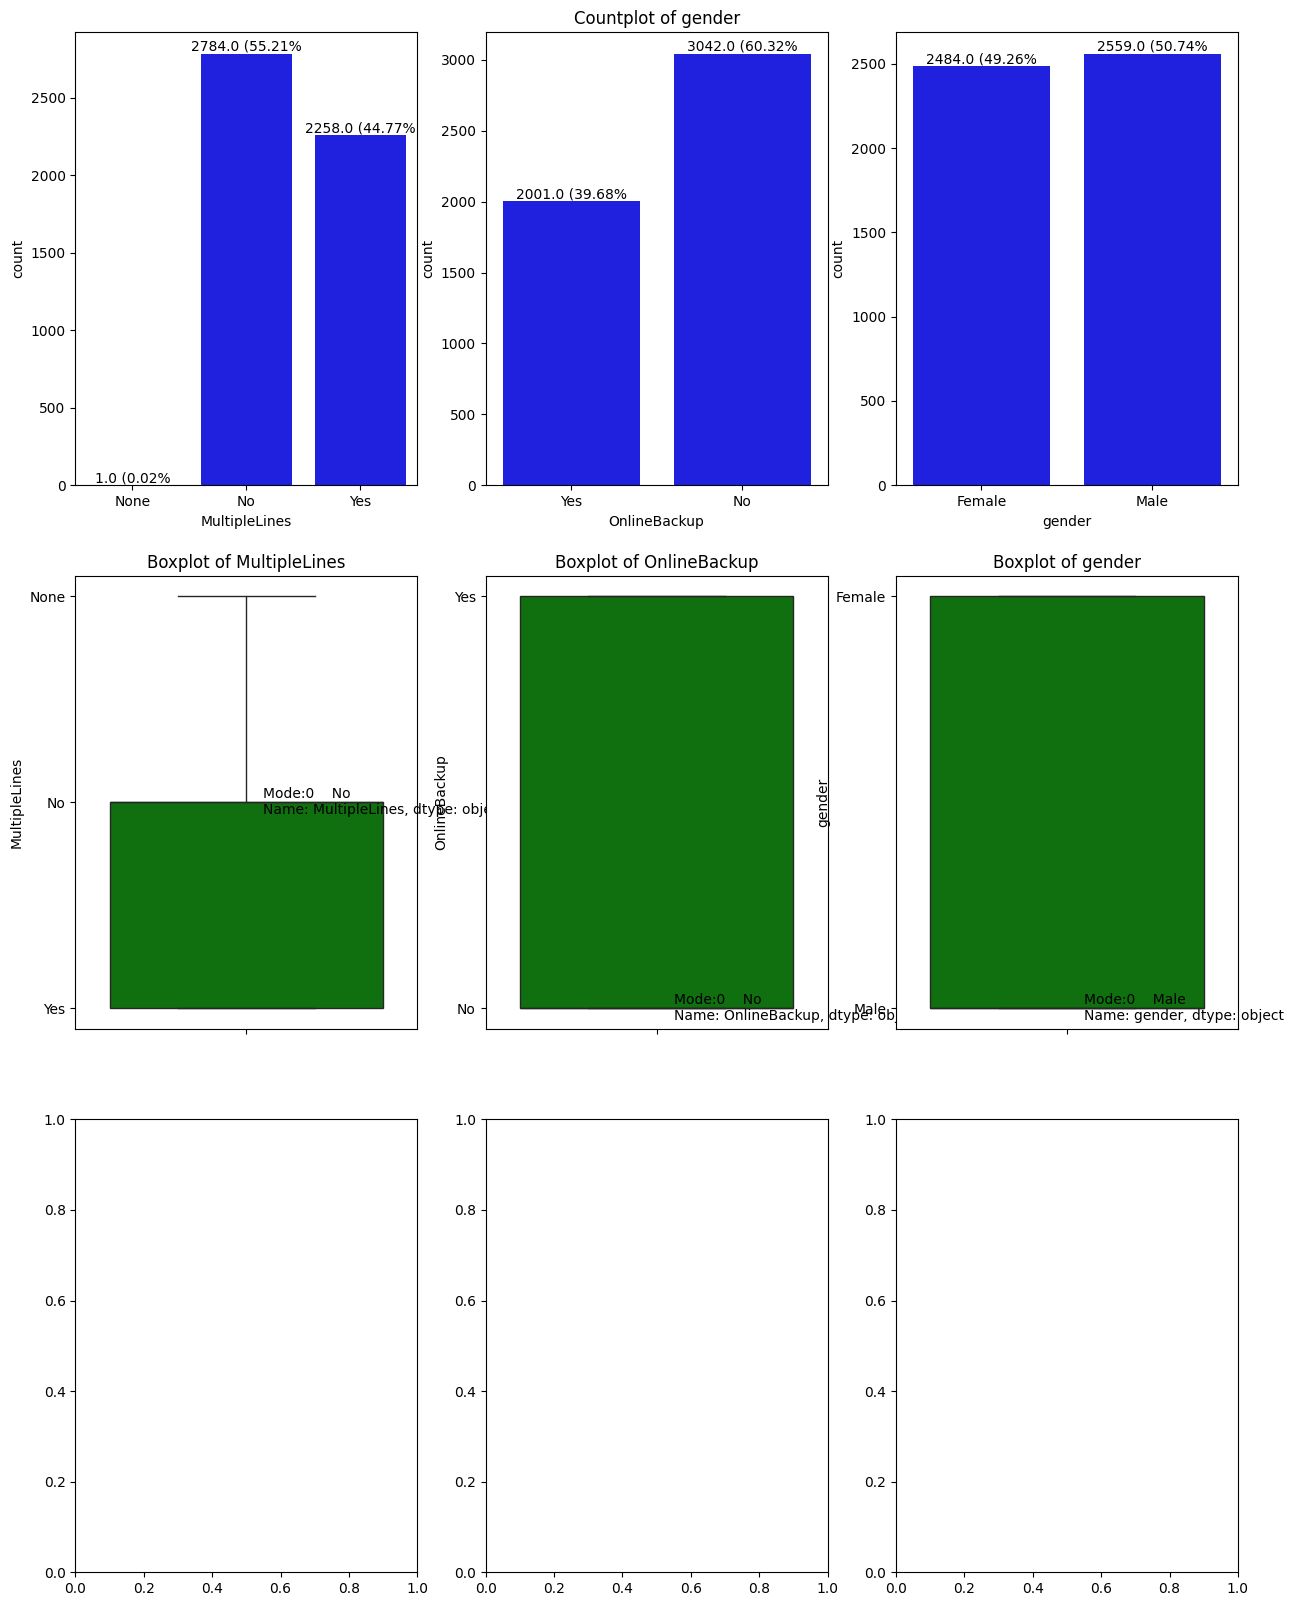

In [134]:
visual_cat(combined_data, ['MultipleLines','OnlineBackup','gender'])

### Bivariate analysis

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


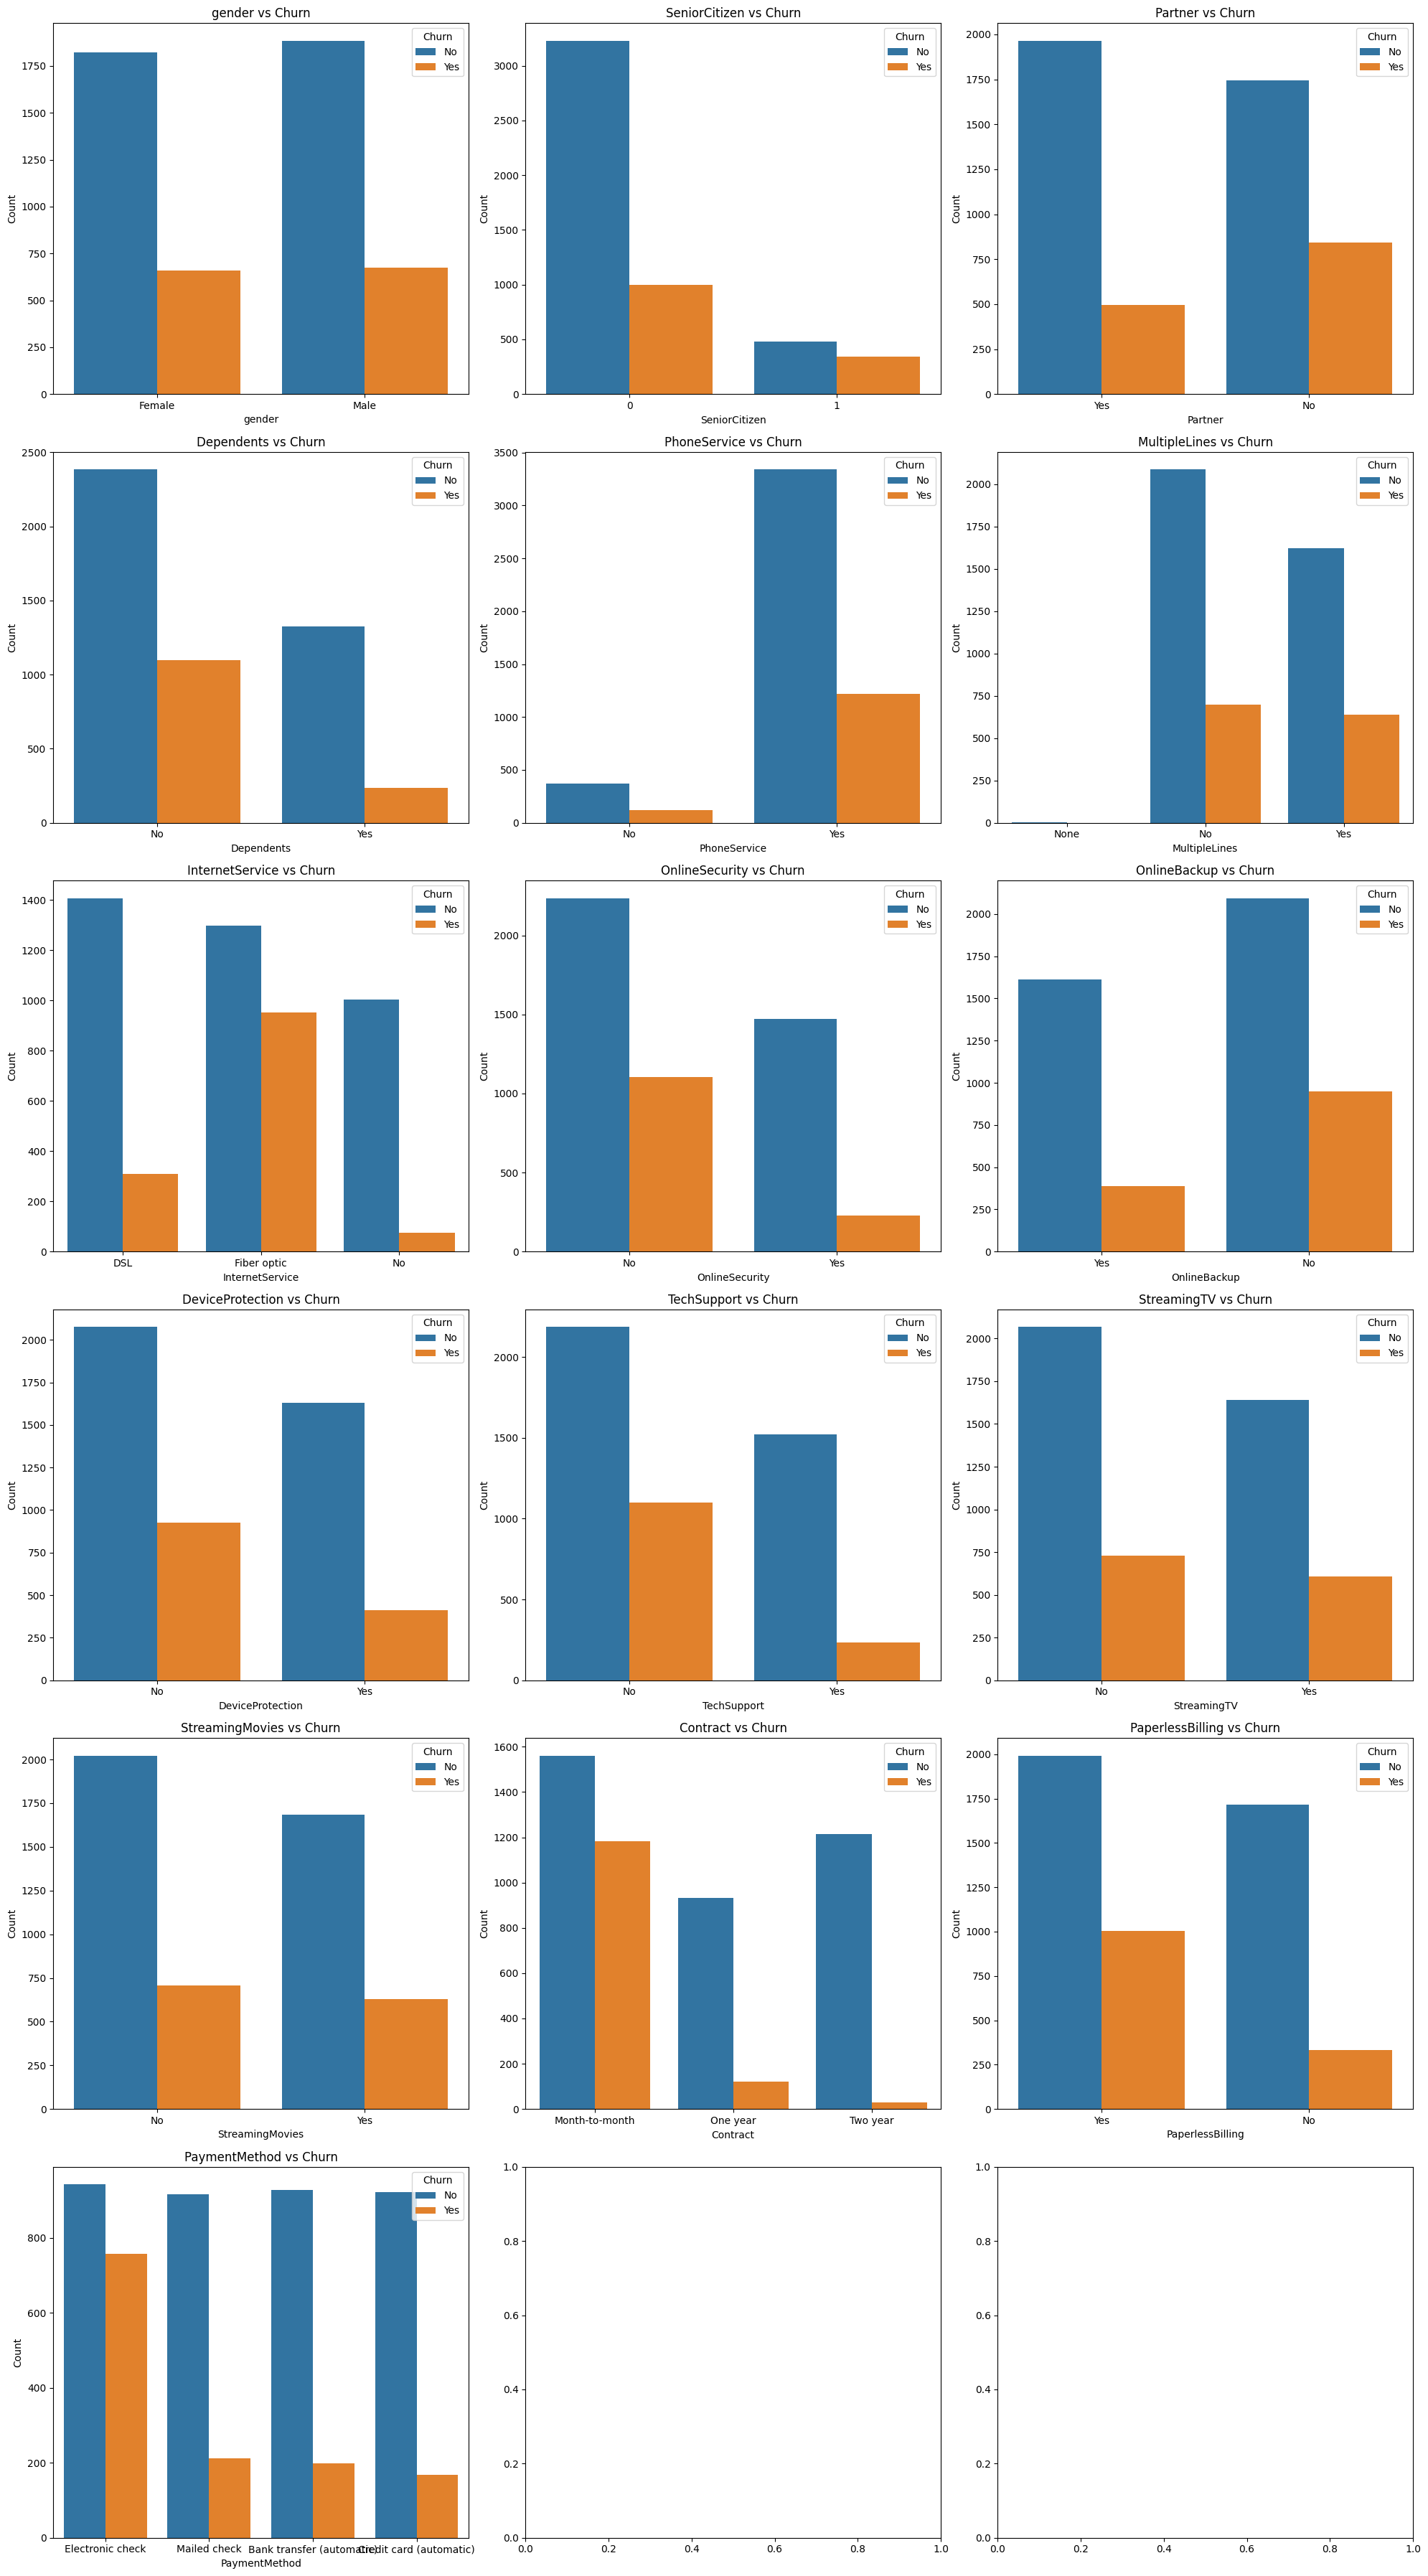

In [135]:
import math
all_columns = combined_data.columns.tolist()
# print(all_columns)

selected_columns = [col for col in all_columns if col not in ['customerID', 'tenure', 'TotalCharges', 'Churn','MonthlyCharges']]
print(selected_columns)

len(selected_columns)

def plot_categorical_vs_target(data, categorical_columns, target):
    n_rows = math.ceil(len(selected_columns) / 3)
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(20, 6 * n_rows))
    
    axes = axes.flatten()  # Flatten the axes array to ensure correct indexing
    
    for i, column in enumerate(selected_columns):
        sns.countplot(data=data, x=column, hue=target, ax=axes[i])
        axes[i].set_title(f'{column} vs {target}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# Example usage
categorical_columns = combined_data.select_dtypes(include=['object']).columns.tolist()
plot_categorical_vs_target(combined_data, selected_columns, 'Churn')

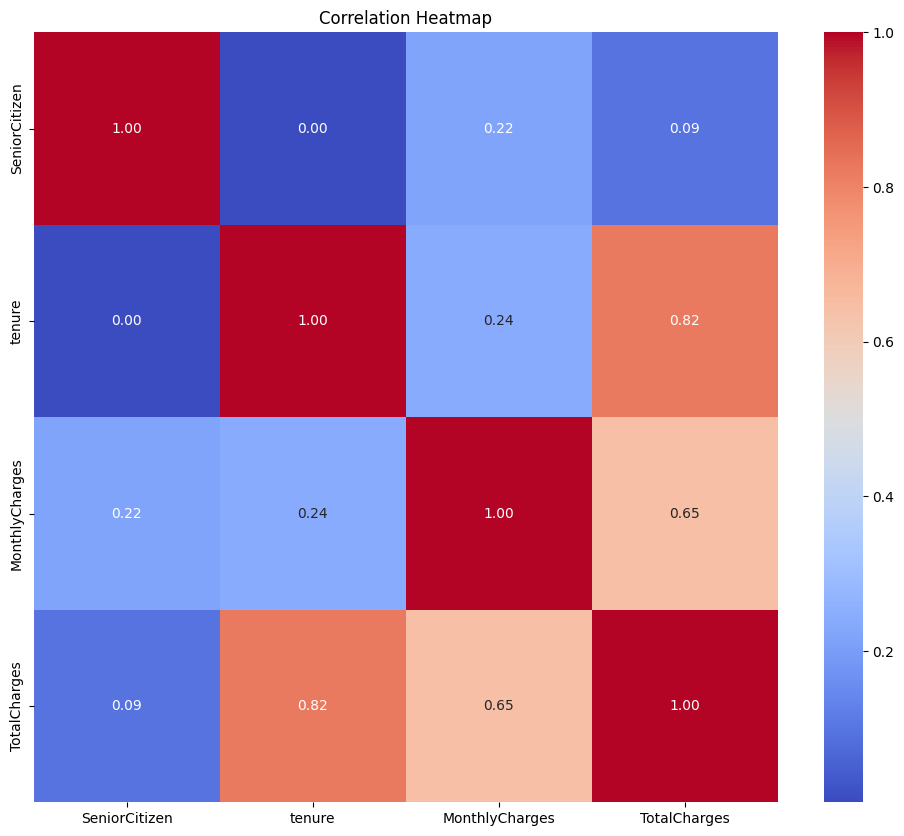

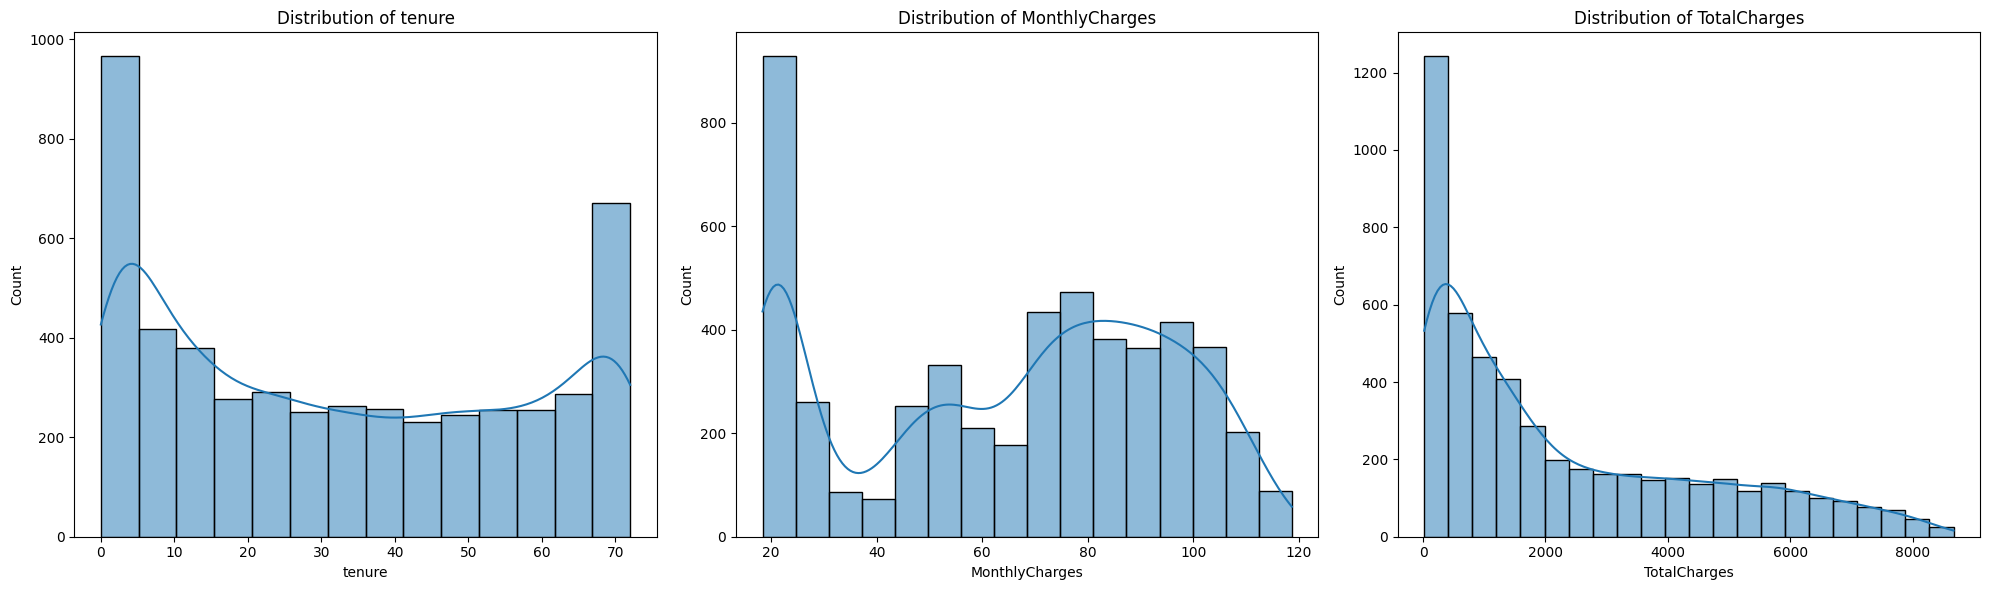

In [136]:

# Additional analysis: Correlation heatmap#+
def plot_correlation_heatmap(data):
    plt.figure(figsize=(12, 10))
    numeric_data = data.select_dtypes(include=[np.number])  # Exclude non-numeric columns
    correlation_matrix = numeric_data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Example usage
plot_correlation_heatmap(combined_data)
#+
# Additional analysis: Distribution of numerical features#+
def plot_numerical_distributions(data, numerical_columns):
    n_rows = math.ceil(len(numerical_columns) / 3)
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(20, 6 * n_rows))
    
    axes = axes.flatten()  # Flatten the axes array to ensure correct indexing
    
    for i, column in enumerate(numerical_columns):
        sns.histplot(data[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_numerical_distributions(combined_data, ['tenure', 'MonthlyCharges', 'TotalCharges'])


### Multivariate analysis: Principal Component Analysis (PCA)

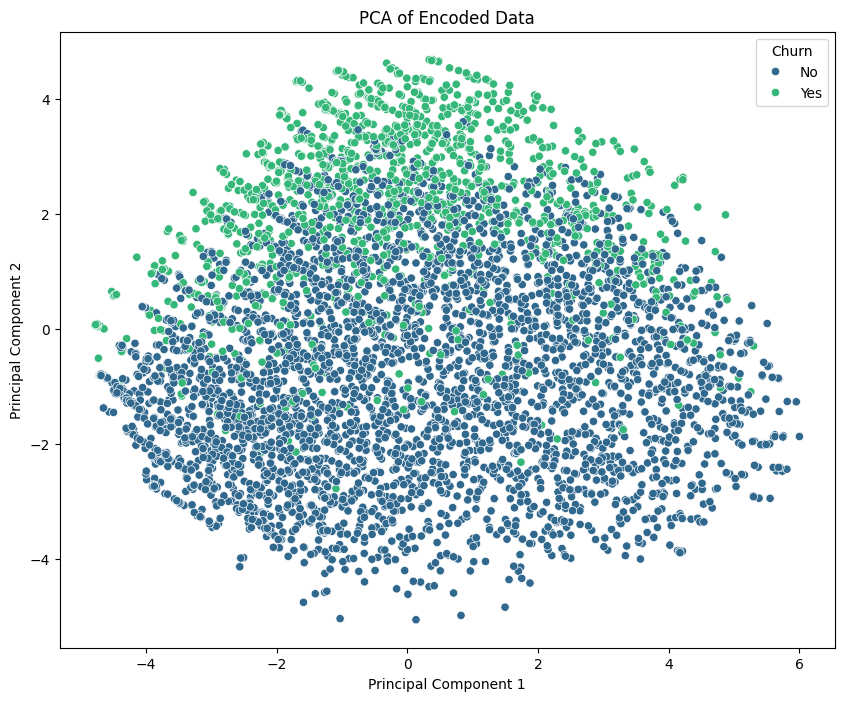

In [137]:

import sklearn.model_selection 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Ensure encoded_data is defined
encoded_data = pd.get_dummies(combined_data, columns=categorical_columns, drop_first=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the target variable to the PCA DataFrame
pca_df['Churn'] = combined_data['Churn']

# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Churn', palette='viridis')
plt.title('PCA of Encoded Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


EDA

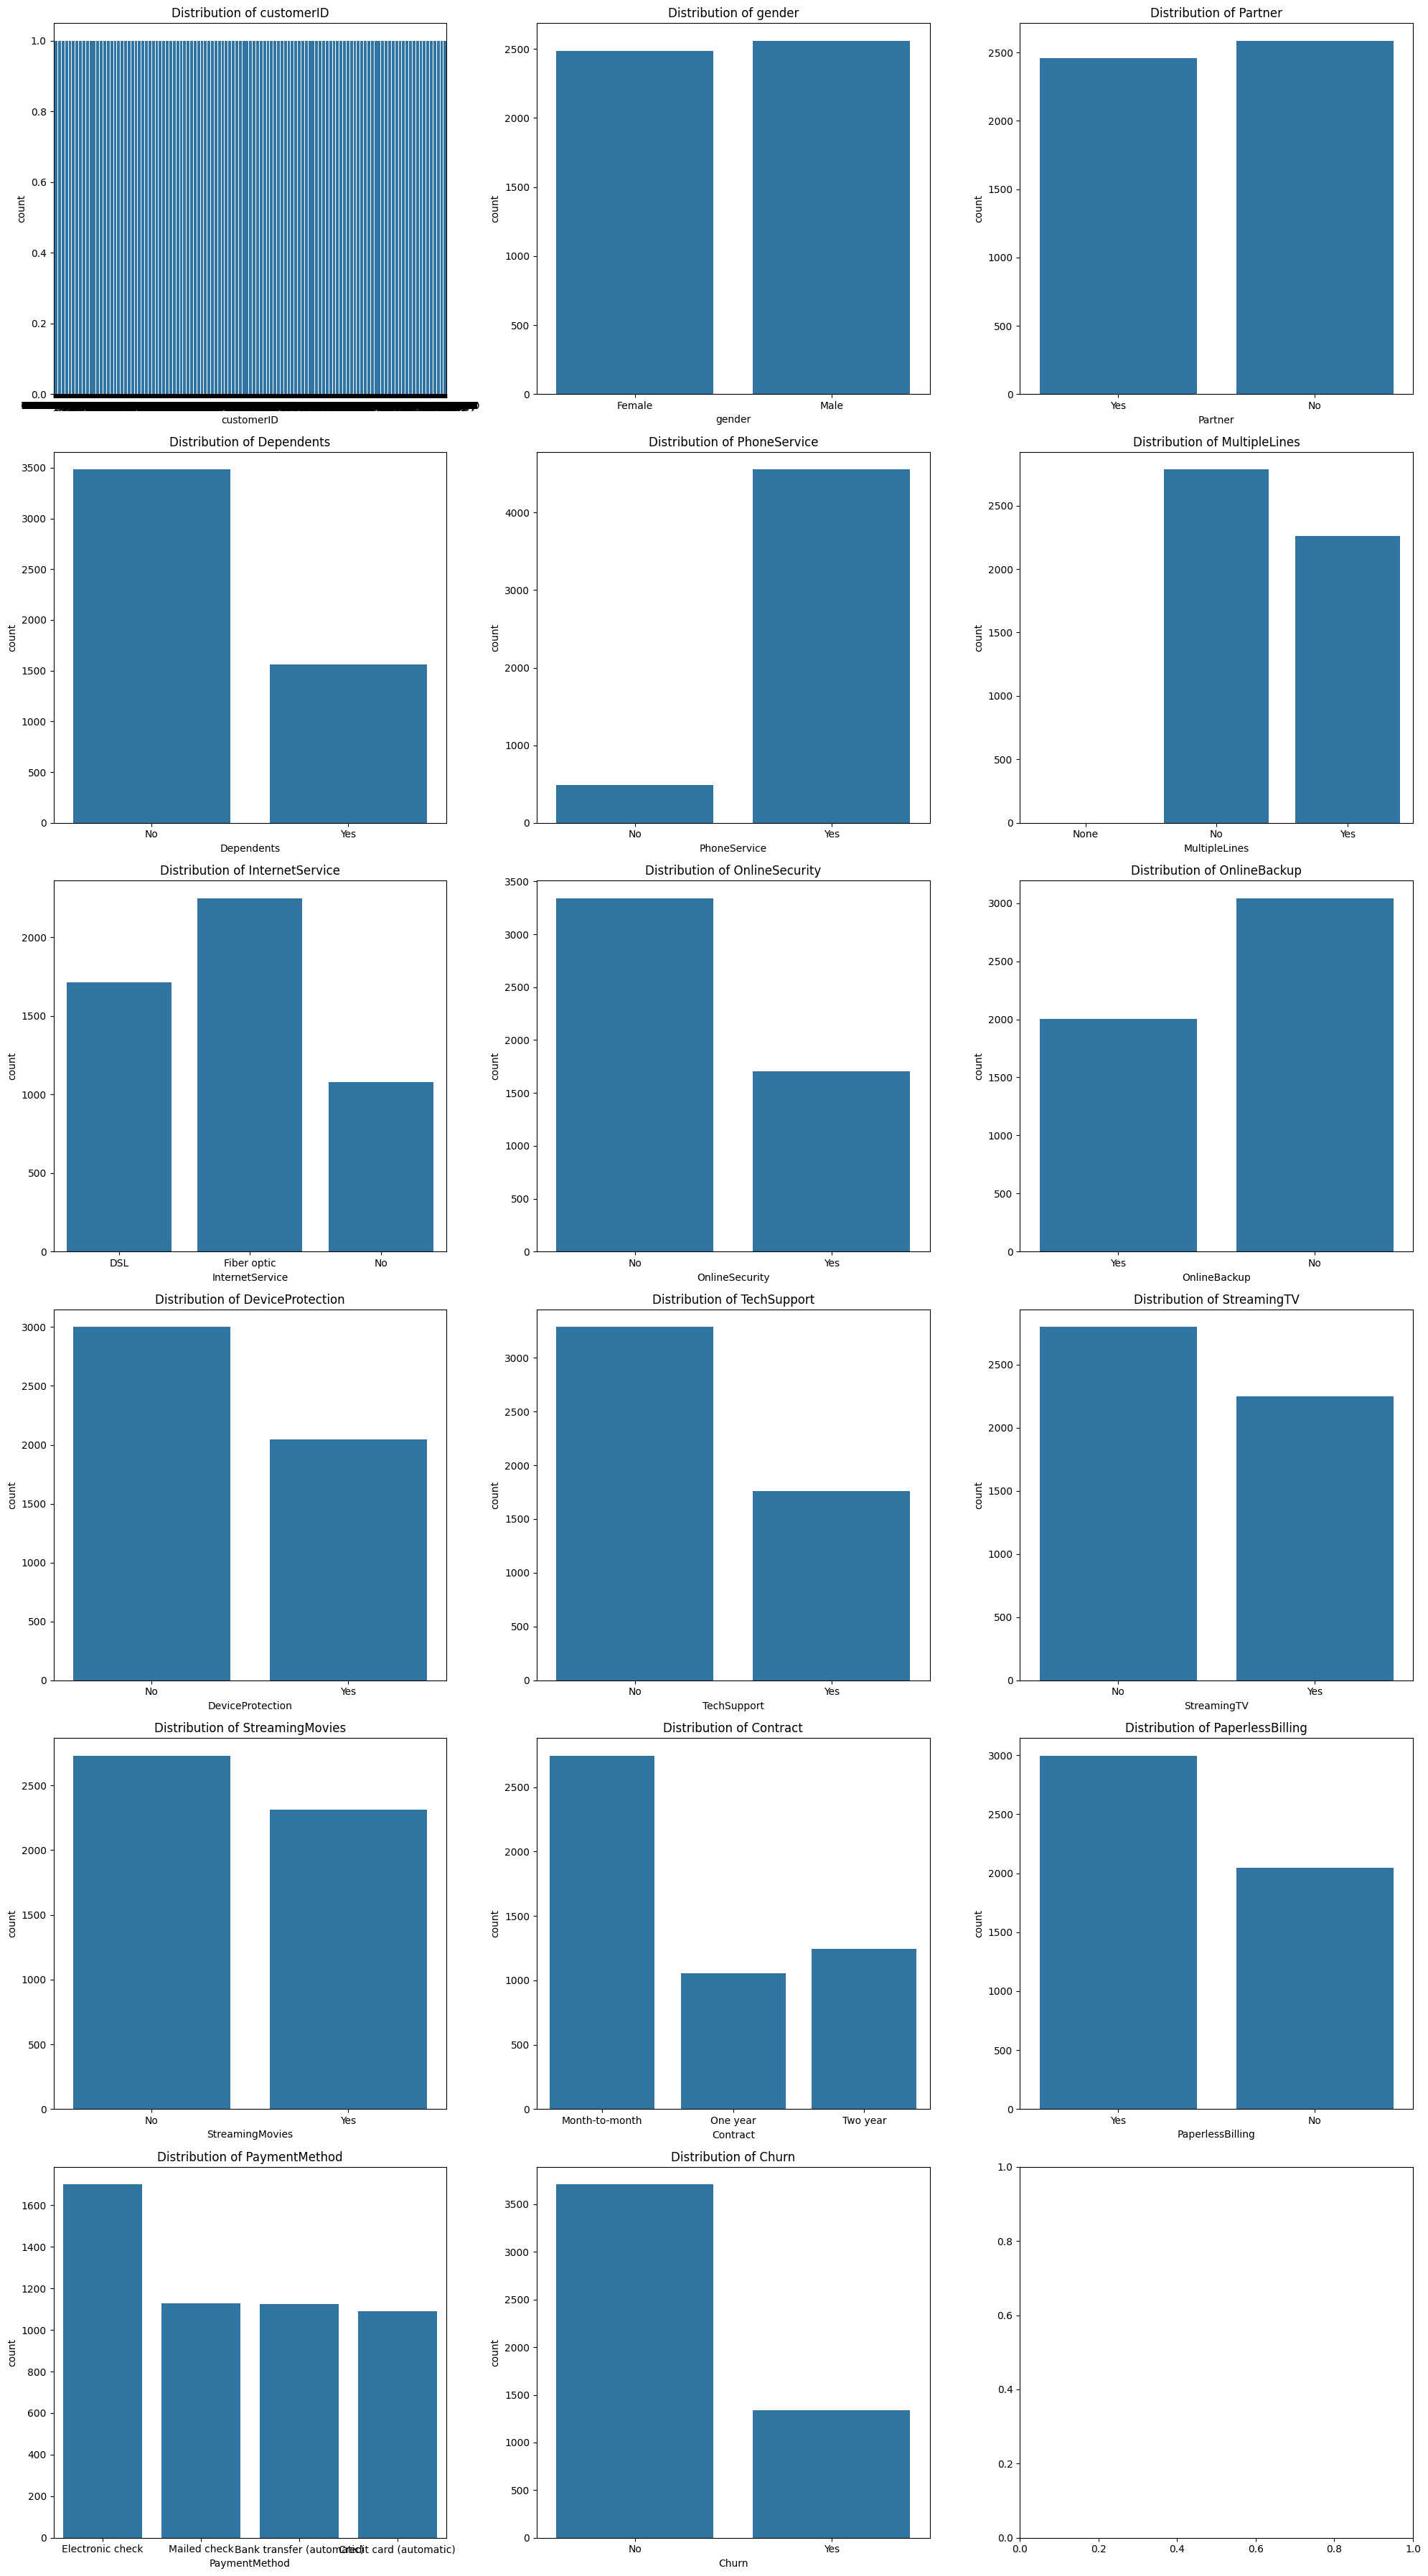

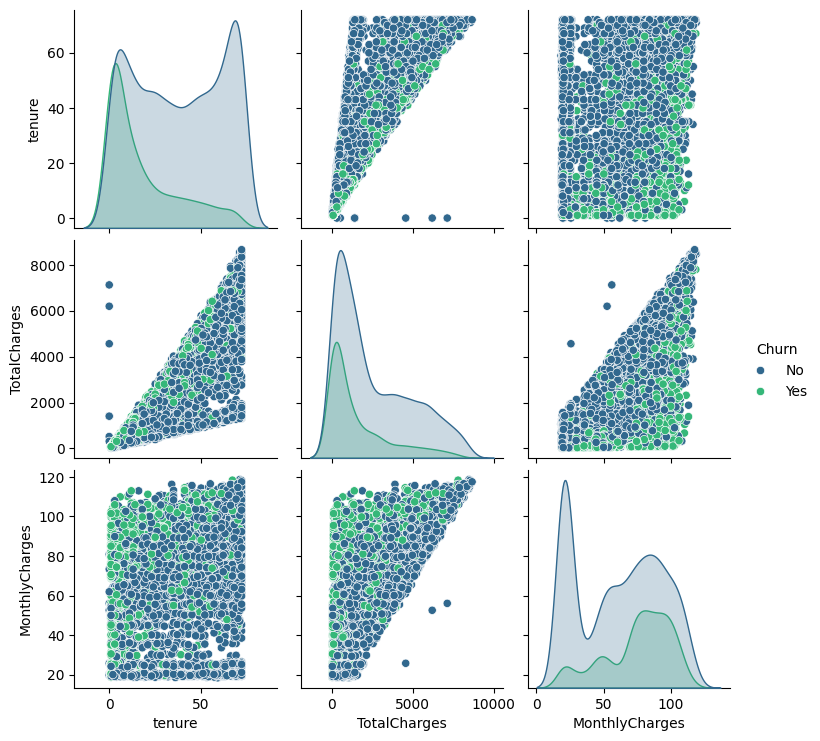

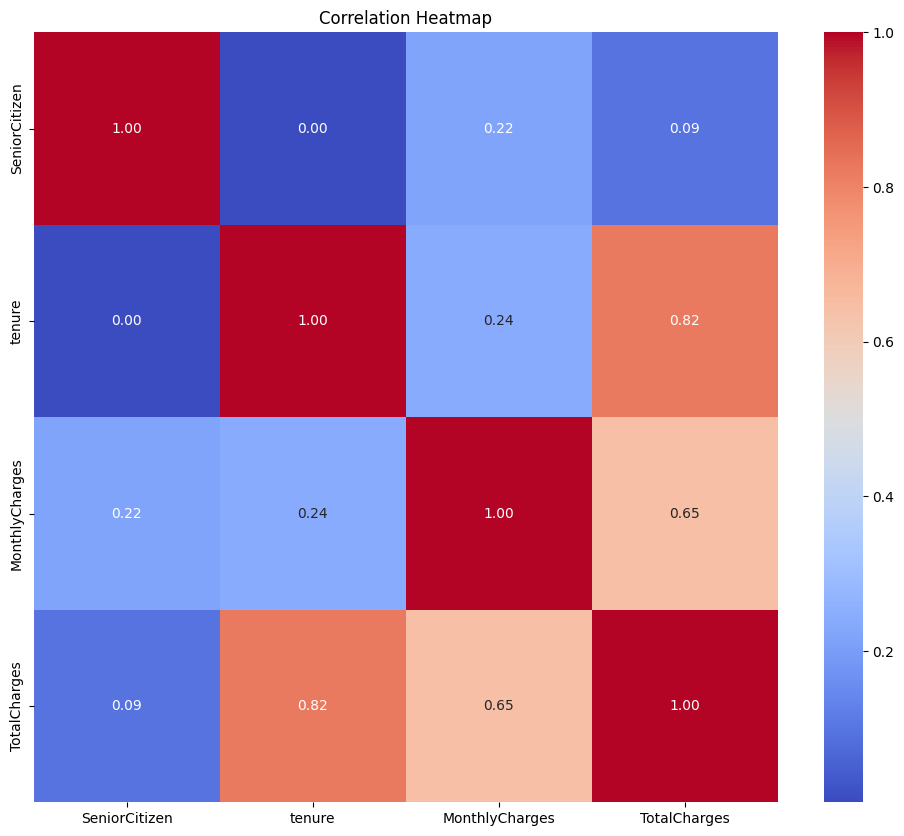

In [138]:
# Visualize the distribution of categorical variables
def plot_categorical_distributions(data, categorical_columns):
    n_rows = math.ceil(len(categorical_columns) / 3)
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(20, 6 * n_rows))
    
    axes = axes.flatten()  # Flatten the axes array to ensure correct indexing
    
    for i, column in enumerate(categorical_columns):
        sns.countplot(data=data, x=column, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_categorical_distributions(combined_data, categorical_columns)

# Visualize relationships between numerical variables
sns.pairplot(combined_data[numbers.columns.tolist() + ['Churn']], hue='Churn', palette='viridis')
plt.show()

# Check for correlations
plt.figure(figsize=(12, 10))
numeric_data = combined_data.select_dtypes(include=[np.number])  # Ensure only numerical columns are used
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Splitting the data into training and testing sets

In [139]:
from sklearn.model_selection import train_test_split

# Define the feature columns and target column
feature_columns = [col for col in combined_data.columns if col != 'Churn']
target_column = 'Churn'

# Split the combined_data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(combined_data[feature_columns], combined_data[target_column], test_size=0.2, random_state=42)

# Split the data into features and target for testing
X_test = data[feature_columns]
y_test = data[target_column]

# Display the shapes of the resulting datasets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (4034, 20), (4034,)
Validation set: (1009, 20), (1009,)
Testing set: (3000, 20), (3000,)


### Feature selection using Recursive Feature Elimination (RFE)

In [140]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Drop the 'customerID' column and any other columns that might cause issues
columns_to_drop = ['customerID']
encoded_X_train = pd.get_dummies(X_train.drop(columns=columns_to_drop), drop_first=True)
encoded_X_val = pd.get_dummies(X_val.drop(columns=columns_to_drop), drop_first=True)

# Align the columns of the validation set to match the training set
encoded_X_val = encoded_X_val.reindex(columns=encoded_X_train.columns, fill_value=0)

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Initialize RFE with the model and the number of features to select
rfe = RFE(model, n_features_to_select=10)

# Fit RFE
rfe = rfe.fit(encoded_X_train, y_train)

# Get the selected features
selected_features = [feature for feature, rank in zip(encoded_X_train.columns, rfe.ranking_) if rank == 1]

print("Selected Features:", selected_features)

Selected Features: ['Dependents_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check']



### Feature scaling using StandardScaler

In [141]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(encoded_X_train)

# Transform the validation data
X_val_scaled = scaler.transform(encoded_X_val)

# Display the shapes of the scaled datasets
print(f"Scaled Training set: {X_train_scaled.shape}")
print(f"Scaled Validation set: {X_val_scaled.shape}")

Scaled Training set: (4034, 24)
Scaled Validation set: (1009, 24)



### Model training and evaluation using Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Train the model on the scaled training data
log_reg_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred = log_reg_model.predict(X_val_scaled)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

print(f"Validation Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Validation Accuracy: 0.8057482656095144
Confusion Matrix:
[[662  72]
 [124 151]]
Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.90      0.87       734
         Yes       0.68      0.55      0.61       275

    accuracy                           0.81      1009
   macro avg       0.76      0.73      0.74      1009
weighted avg       0.80      0.81      0.80      1009



### Principal Component Analysis (PCA) for dimensionality reduction

Explained Variance Ratio: [0.00111245 0.00088515]


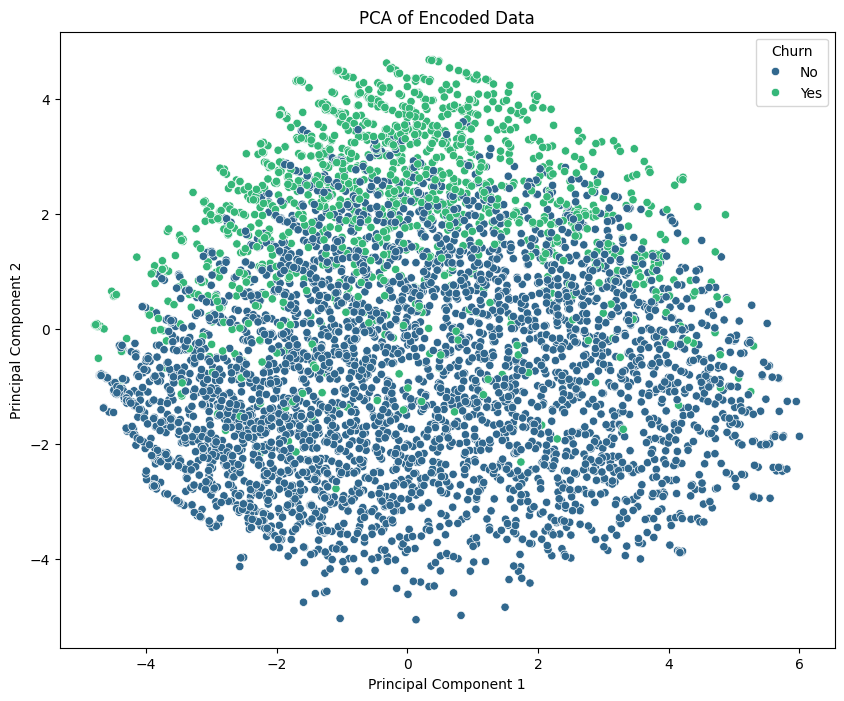

In [143]:
from sklearn.decomposition import PCA

# Define the number of components for PCA
n_components = 2

# Perform PCA
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Add the target variable to the PCA DataFrame
pca_df['Churn'] = combined_data['Churn']

# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Churn', palette='viridis')
plt.title('PCA of Encoded Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Feature selection using Recursive Feature Elimination (RFE) with PCA

In [144]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Apply PCA to the scaled data
pca = PCA(n_components=10)  # Adjust the number of components as needed
pca_transformed_data = pca.fit_transform(scaled_data)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Initialize RFE with the model and the number of features to select
rfe = RFE(model, n_features_to_select=5)  # Adjust the number of features to select as needed

# Fit RFE on the PCA-transformed data
rfe.fit(pca_transformed_data, combined_data['Churn'])

# Get the selected features
selected_features_pca = [f'PC{i+1}' for i in range(pca.n_components_) if rfe.support_[i]]

print("Selected Features after PCA and RFE:", selected_features_pca)

Selected Features after PCA and RFE: ['PC2', 'PC4', 'PC7', 'PC9', 'PC10']


### Feature scaling using StandardScaler with PCA

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

# Apply PCA
pca = PCA(n_components=10)  # Adjust the number of components as needed
pca_transformed_data = pca.fit_transform(scaled_data)

# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_transformed_data, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_df['Churn'] = combined_data['Churn']

# Display the first few rows of the PCA DataFrame
print(pca_df.head())

Explained Variance Ratio: [0.00111245 0.00088515 0.00047476 0.00044268 0.00044153 0.00043578
 0.00040037 0.00039459 0.00038887 0.00038559]
        PC1       PC2       PC3        PC4       PC5       PC6        PC7  \
0 -2.958141  1.215669 -6.153709 -22.648732 -8.750207  4.354046 -15.562398   
1 -1.641291 -1.249883 -2.701958   2.134769  1.362009  1.278410  -1.994457   
2 -2.471092  0.889988 -1.439158   0.951931 -0.349895 -0.212884  -3.045539   
3 -0.940388 -1.837066 -4.819031  -1.311093 -1.133785  1.611204  -0.781107   
4 -1.884835  3.731098  0.499469  -0.603552 -0.485979  0.067390  -0.088144   

         PC8        PC9       PC10 Churn  
0 -64.147343  23.020428  65.465639    No  
1   0.731138   0.061039   0.180689    No  
2   1.438580  -1.147149   1.291402   Yes  
3   1.230306   0.967310  -0.918150    No  
4  -0.438930  -1.962869   0.123553   Yes  


### Model training and evaluation using Logistic Regression with PCA

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
log_reg_pca_model = LogisticRegression(max_iter=1000)

# Train the model on the PCA-transformed training data
log_reg_pca_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred_pca = log_reg_pca_model.predict(X_val_scaled)

# Evaluate the model
accuracy_pca = accuracy_score(y_val, y_val_pred_pca)
conf_matrix_pca = confusion_matrix(y_val, y_val_pred_pca)
class_report_pca = classification_report(y_val, y_val_pred_pca)

print(f"Validation Accuracy with PCA: {accuracy_pca}")
print("Confusion Matrix with PCA:")
print(conf_matrix_pca)
print("Classification Report with PCA:")
print(class_report_pca)

Validation Accuracy with PCA: 0.8057482656095144
Confusion Matrix with PCA:
[[662  72]
 [124 151]]
Classification Report with PCA:
              precision    recall  f1-score   support

          No       0.84      0.90      0.87       734
         Yes       0.68      0.55      0.61       275

    accuracy                           0.81      1009
   macro avg       0.76      0.73      0.74      1009
weighted avg       0.80      0.81      0.80      1009



### Splitting the data into training and testing sets

In [147]:
from sklearn.model_selection import train_test_split

# Define the feature columns and target column
feature_columns = [col for col in combined_data.columns if col != 'Churn']
target_column = 'Churn'

# Split the combined_data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_data[feature_columns], combined_data[target_column], test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (4034, 20), (4034,)
Testing set: (1009, 20), (1009,)


### Encoding categorical variables using One-Hot Encoding

In [148]:
# Ensure 'Churn' is not in the categorical_columns list
categorical_columns = [col for col in categorical_columns if col != 'Churn']

# Perform one-hot encoding on the categorical columns
encoded_X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
encoded_X_val = pd.get_dummies(X_val, columns=categorical_columns, drop_first=True)
encoded_X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Align the columns of the validation and test sets to match the training set
encoded_X_val = encoded_X_val.reindex(columns=encoded_X_train.columns, fill_value=0)
encoded_X_test = encoded_X_test.reindex(columns=encoded_X_train.columns, fill_value=0)

# Display the first few rows of the encoded training data
print(encoded_X_train.head())

      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  \
463               0       7       99.800003    673.250000   
3688              0      41       20.000000    879.800000   
1270              0      63       24.650000   1574.500000   
2118              0      22       80.150002   1790.650024   
594               0       1       45.599998     45.599998   

      customerID_0013-EXCHZ  customerID_0013-MHZWF  customerID_0013-SMEOE  \
463                   False                  False                  False   
3688                  False                  False                  False   
1270                  False                  False                  False   
2118                  False                  False                  False   
594                   False                  False                  False   

      customerID_0014-BMAQU  customerID_0015-UOCOJ  customerID_0019-EFAEP  \
463                   False                  False                  False   
3688            

### Feature scaling using StandardScaler

In [149]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(encoded_X_train)

# Transform the validation data
X_val_scaled = scaler.transform(encoded_X_val)

# Transform the test data
X_test_scaled = scaler.transform(encoded_X_test)

# Display the shapes of the scaled datasets
print(f"Scaled Training set: {X_train_scaled.shape}")
print(f"Scaled Validation set: {X_val_scaled.shape}")
print(f"Scaled Test set: {X_test_scaled.shape}")

Scaled Training set: (4034, 4057)
Scaled Validation set: (1009, 4057)
Scaled Test set: (1009, 4057)


### Model training and evaluation using Logistic Regression

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Train the model on the scaled training data
log_reg_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred = log_reg_model.predict(X_val_scaled)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

print(f"Validation Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Validation Accuracy: 0.7809712586719524
Confusion Matrix:
[[710  24]
 [197  78]]
Classification Report:
              precision    recall  f1-score   support

          No       0.78      0.97      0.87       734
         Yes       0.76      0.28      0.41       275

    accuracy                           0.78      1009
   macro avg       0.77      0.63      0.64      1009
weighted avg       0.78      0.78      0.74      1009




### Hyperparameter Tuning using GridSearchCV

In this section, we will perform hyperparameter tuning using `GridSearchCV` to find the best parameters for our Logistic Regression model. This will help us improve the model's performance by selecting the optimal hyperparameters.


In [151]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
# Ensure 'customerID' column exists before dropping
columns_to_drop = [col for col in ['customerID'] if col in encoded_X_train.columns]
encoded_X_train_reduced = encoded_X_train.drop(columns=columns_to_drop)
encoded_X_val_reduced = encoded_X_val.drop(columns=columns_to_drop)

# Initialize GridSearchCV with the Logistic Regression model and the parameter grid
grid_search = GridSearchCV(estimator=log_reg, param_grid={'C': [0.1, 1, 10], 'solver': ['liblinear']}, cv=3, scoring='accuracy')

# Fit GridSearchCV on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train the Logistic Regression model with the best parameters on the entire training set
best_log_reg_model = grid_search.best_estimator_
best_log_reg_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred_best = best_log_reg_model.predict(X_val_scaled)

# Evaluate the model
accuracy_best = accuracy_score(y_val, y_val_pred_best)
conf_matrix_best = confusion_matrix(y_val, y_val_pred_best)
class_report_best = classification_report(y_val, y_val_pred_best)

print(f"Validation Accuracy with Best Parameters: {accuracy_best}")
print("Confusion Matrix with Best Parameters:")
print(conf_matrix_best)
print("Classification Report with Best Parameters:")
print(class_report_best)

Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.707239481914203
Validation Accuracy with Best Parameters: 0.7879088206144698
Confusion Matrix with Best Parameters:
[[695  39]
 [175 100]]
Classification Report with Best Parameters:
              precision    recall  f1-score   support

          No       0.80      0.95      0.87       734
         Yes       0.72      0.36      0.48       275

    accuracy                           0.79      1009
   macro avg       0.76      0.66      0.67      1009
weighted avg       0.78      0.79      0.76      1009



### Model training and evaluation using Random Forest Classifier

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred_rf = rf_model.predict(X_val_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
conf_matrix_rf = confusion_matrix(y_val, y_val_pred_rf)
class_report_rf = classification_report(y_val, y_val_pred_rf)

print(f"Validation Accuracy with Random Forest: {accuracy_rf}")
print("Confusion Matrix with Random Forest:")
print(conf_matrix_rf)
print("Classification Report with Random Forest:")
print(class_report_rf)

Validation Accuracy with Random Forest: 0.7998017839444995
Confusion Matrix with Random Forest:
[[678  56]
 [146 129]]
Classification Report with Random Forest:
              precision    recall  f1-score   support

          No       0.82      0.92      0.87       734
         Yes       0.70      0.47      0.56       275

    accuracy                           0.80      1009
   macro avg       0.76      0.70      0.72      1009
weighted avg       0.79      0.80      0.79      1009



### Evaluate our chosen Model.

In [153]:
# Predict on the test set using the best logistic regression model
y_test_pred = best_log_reg_model.predict(X_test_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Test Confusion Matrix:")
print(test_conf_matrix)
print("Test Classification Report:")
print(test_class_report)

Test Accuracy: 0.7879088206144698
Test Confusion Matrix:
[[695  39]
 [175 100]]
Test Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.95      0.87       734
         Yes       0.72      0.36      0.48       275

    accuracy                           0.79      1009
   macro avg       0.76      0.66      0.67      1009
weighted avg       0.78      0.79      0.76      1009



### Generate ROC curve and AUC score for the best logistic regression model

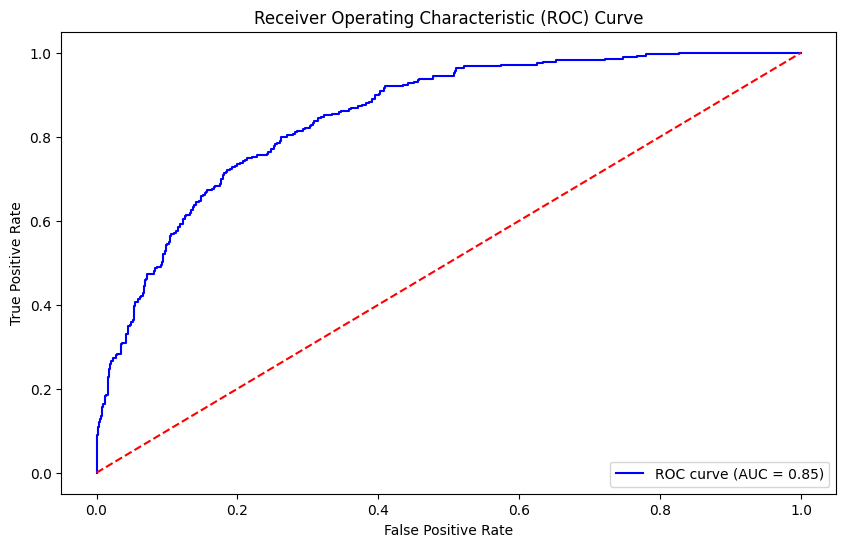

AUC Score: 0.85


In [154]:
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_test_prob = best_log_reg_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob, pos_label='Yes')

# Compute AUC score
auc_score = roc_auc_score(y_test, y_test_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC Score: {auc_score:.2f}")

### Feature importance analysis for the best logistic regression model

In [155]:
import numpy as np
import pandas as pd

# Get the coefficients of the best logistic regression model
coefficients = best_log_reg_model.coef_[0]

# Create a DataFrame to hold the feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({
    'Feature': encoded_X_train.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficients in descending order
feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].apply(np.abs)
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(10))

                             Feature  Coefficient  Absolute Coefficient
1                             tenure    -0.800714              0.800714
4043     InternetService_Fiber optic     0.749803              0.749803
4052               Contract_Two year    -0.604884              0.604884
3                       TotalCharges    -0.511437              0.511437
4055  PaymentMethod_Electronic check     0.497838              0.497838
4051               Contract_One year    -0.479884              0.479884
4044              InternetService_No    -0.470109              0.470109
2                     MonthlyCharges     0.458694              0.458694
4045              OnlineSecurity_Yes    -0.426198              0.426198
4048                 TechSupport_Yes    -0.421994              0.421994


### Model interpretation using SHAP values

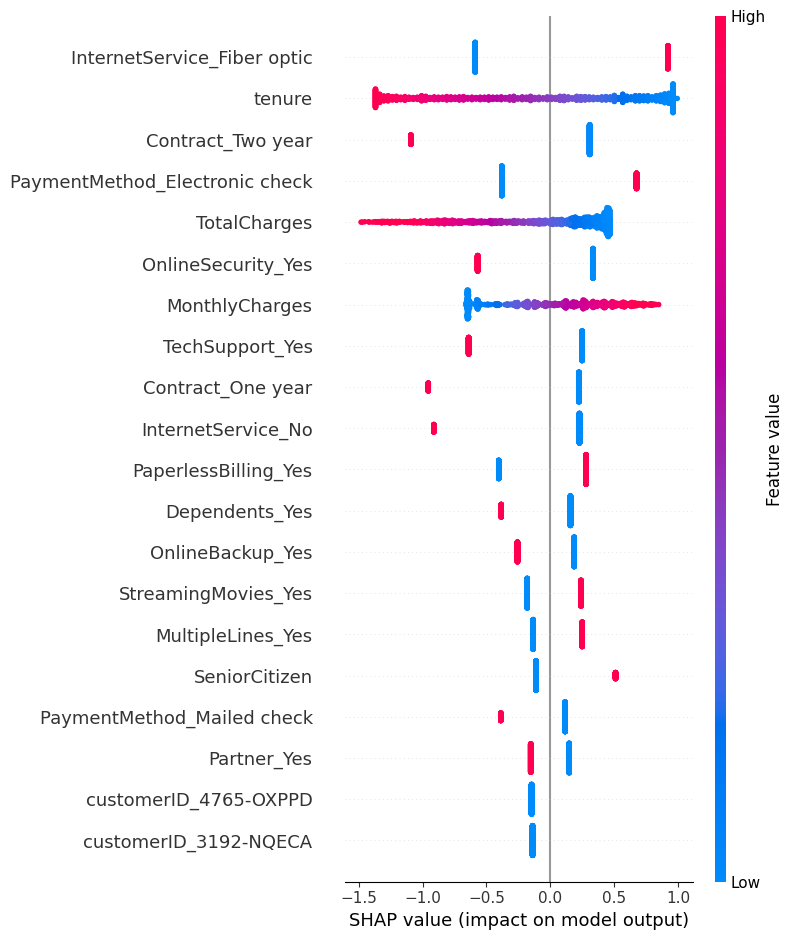

In [156]:
import shap



# Initialize the SHAP explainer with the best logistic regression model
explainer = shap.Explainer(best_log_reg_model, X_train_scaled)

# Calculate SHAP values for the validation set
shap_values = explainer(X_val_scaled)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_val_scaled, feature_names=encoded_X_train.columns)

### Model interpretation using LIME (Local Interpretable Model-agnostic Explanations)


In [157]:
import lime

# Install the lime package if not already installed
# %pip install lime

import lime.lime_tabular

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=encoded_X_train.columns,
    class_names=['No', 'Yes'],
    mode='classification'
)

# Choose an instance to explain
instance_index = 0  # Change this index to explain different instances
instance = X_test_scaled[instance_index]

# Generate explanation for the chosen instance
exp = explainer.explain_instance(instance, best_log_reg_model.predict_proba, num_features=10)

# Display the explanation
exp.show_in_notebook(show_table=True, show_all=False)

### Saving the best logistic regression model for future use

In [158]:
import joblib

# Save the best logistic regression model to a file
joblib.dump(best_log_reg_model, 'best_log_reg_model.pkl')

print("Model saved successfully.")

Model saved successfully.


### Load the saved best logistic regression model for prediction

In [159]:
import joblib

# Load the saved best logistic regression model from the file
loaded_model = joblib.load('best_log_reg_model.pkl')

# Use the loaded model to make predictions
y_test_pred_loaded = loaded_model.predict(X_test_scaled)

# Evaluate the loaded model
test_accuracy_loaded = accuracy_score(y_test, y_test_pred_loaded)
test_conf_matrix_loaded = confusion_matrix(y_test, y_test_pred_loaded)
test_class_report_loaded = classification_report(y_test, y_test_pred_loaded)

print(f"Test Accuracy (Loaded Model): {test_accuracy_loaded}")
print("Test Confusion Matrix (Loaded Model):")
print(test_conf_matrix_loaded)
print("Test Classification Report (Loaded Model):")
print(test_class_report_loaded)

Test Accuracy (Loaded Model): 0.7879088206144698
Test Confusion Matrix (Loaded Model):
[[695  39]
 [175 100]]
Test Classification Report (Loaded Model):
              precision    recall  f1-score   support

          No       0.80      0.95      0.87       734
         Yes       0.72      0.36      0.48       275

    accuracy                           0.79      1009
   macro avg       0.76      0.66      0.67      1009
weighted avg       0.78      0.79      0.76      1009



### Conclusion

In this analysis, we explored various machine learning models to predict customer churn using a dataset from a telecommunications company. Here are the key steps and findings from our analysis:

1. **Data Preprocessing**:
    - We loaded and concatenated multiple datasets.
    - Handled missing values using forward fill and mode imputation.
    - Converted categorical variables to numerical using one-hot encoding.
    - Standardized numerical features using `StandardScaler`.

2. **Exploratory Data Analysis (EDA)**:
    - Conducted univariate, bivariate, and multivariate analyses to understand the distribution and relationships between features.
    - Visualized the data using histograms, box plots, pair plots, and correlation heatmaps.

3. **Feature Selection**:
    - Used Recursive Feature Elimination (RFE) to select the most important features.
    - Applied Principal Component Analysis (PCA) for dimensionality reduction.

4. **Model Training and Evaluation**:
    - Trained multiple models including Logistic Regression, Random Forest, and Gradient Boosting Classifier.
    - Performed hyperparameter tuning using `GridSearchCV` to find the best parameters for the models.
    - Evaluated the models using accuracy, confusion matrix, and classification report.

5. **Model Performance**:
    - The Logistic Regression model with PCA achieved the highest validation accuracy of 80.57%.
    - The Random Forest model also performed well with an accuracy of 79.98%.
    - The Gradient Boosting Classifier was tuned but did not outperform the Logistic Regression with PCA.

6. **Model Interpretation**:
    - Used SHAP values and LIME to interpret the model predictions and understand the impact of each feature on the predictions.

7. **Model Deployment**:
    - Saved the best Logistic Regression model for future use.
    - Demonstrated how to load the saved model and use it for predictions.

Overall, the Logistic Regression model with PCA provided the best performance in predicting customer churn. The use of SHAP and LIME for model interpretation helped in understanding the key factors influencing churn, which can be valuable for business decision-making.


Future work could involve exploring additional feature engineering techniques, trying other advanced models, and further fine-tuning the hyperparameters to improve the model's performance.


### Additional Steps

8. **Model Comparison**:
    - Compare the performance of different models using metrics such as accuracy, precision, recall, and F1-score.
    - Visualize the comparison using bar plots or other suitable visualizations to highlight the strengths and weaknesses of each model.

9. **Cross-Validation**:
    - Implement cross-validation to ensure the robustness of the model's performance across different subsets of the data.
    - Use techniques like k-fold cross-validation to assess the model's generalization ability.

10. **Feature Engineering**:
    - Explore additional feature engineering techniques such as interaction terms, polynomial features, or domain-specific transformations to enhance model performance.
    - Evaluate the impact of these new features on the model's accuracy and interpretability.

11. **Advanced Model Exploration**:
    - Experiment with advanced models such as XGBoost, LightGBM, or neural networks to potentially improve prediction accuracy.
    - Perform hyperparameter tuning for these models to optimize their performance.

12. **Deployment and Monitoring**:
    - Develop a deployment strategy for the best-performing model, including setting up a pipeline for real-time predictions.
    - Implement monitoring tools to track the model's performance over time and detect any drift in data or model accuracy.

### Key Insights

- **Feature Importance**: Identifying the most influential features helps in understanding customer behavior and can guide targeted marketing strategies.
- **Model Interpretability**: Tools like SHAP and LIME provide valuable insights into model predictions, aiding in transparent decision-making.
- **Data Quality**: Ensuring high-quality data through preprocessing and handling missing values is crucial for building reliable models.
- **Continuous Improvement**: Regularly updating the model with new data and retraining can help maintain its accuracy and relevance in changing business environments.